In [125]:
import librosa
import numpy as np

sr = 8000

In [126]:
def load_waves(dir):
    waves = []

    for i in range(4):
        y, _ = librosa.load(f"{dir}/input_{i}.wav", sr=sr)
        waves.append(y)
    return waves

In [127]:
waves = load_waves(".")
total_len = len(waves[0])

In [128]:
def encode(waves):
    freqs = [np.fft.fft(wave) for wave in waves]
    length = len(freqs[0])
    zeros = np.zeros(length * 2)
    half = length // 2
    freq_after = np.concatenate((freqs[0][:half], freqs[1][:half], freqs[2][:half], freqs[3][:half], zeros, freqs[3][half:], freqs[2][half:], freqs[1][half:], freqs[0][half:]))
    output_wave = np.fft.ifft(freq_after)
    output_wave = np.real(output_wave)
    return output_wave

In [129]:
N = 1

In [130]:
import soundfile

output_waves = []
for i in range(total_len // sr // N):
    output_waves.append(encode([wave[sr * N * i : sr * N * (i + 1)] for wave in waves]))

output_wave = np.concatenate(output_waves)
output_sr = 48000
soundfile.write(f"output_N={N}.wav", output_wave, output_sr)

In [131]:
def decode(wave_merge):
    freq_merge = np.fft.fft(wave_merge)
    half = len(freq_merge) // 12
    freq_after = []
    for i in range(4):
        freq_after.append(np.concatenate((freq_merge[i * half : i * half + half], freq_merge[(11 - i) * half : (11 - i) * half + half])))
    wave_after = [np.real(np.fft.ifft(freq)) for freq in freq_after]
    return wave_after

In [132]:
wave_merge, _ = librosa.load(f"output_N={N}.wav", sr=None)

waves_after = [[], [], [], []]

for i in range(total_len // sr // N):
    waves_decode = decode(wave_merge[output_sr * N * i : output_sr * N * (i + 1)])
    for j in range(4):
        waves_after[j].append(waves_decode[j])

wave_after = [np.concatenate(waves) for waves in waves_after]

for i, wave in enumerate(wave_after):
    soundfile.write(f"output_N={N}_{i}.wav", wave, sr)

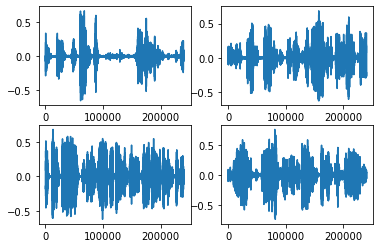

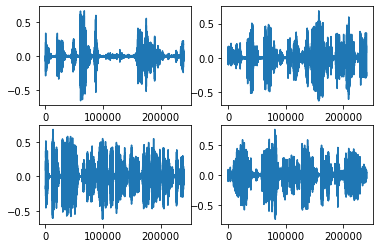

In [133]:
import matplotlib.pyplot as plt

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.plot(waves[i])
plt.savefig(f"origin_waves.png")
plt.show()

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.plot(wave_after[i])
plt.savefig(f"after_waves_{N}.png")
plt.show()